In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
np.random.seed(0)
x = 2-3*np.random.normal(0,1,100)
y = x-2*(x**2)+1.5*(x**3)+np.random.normal(-3,3,100)
x = x[:, np.newaxis]

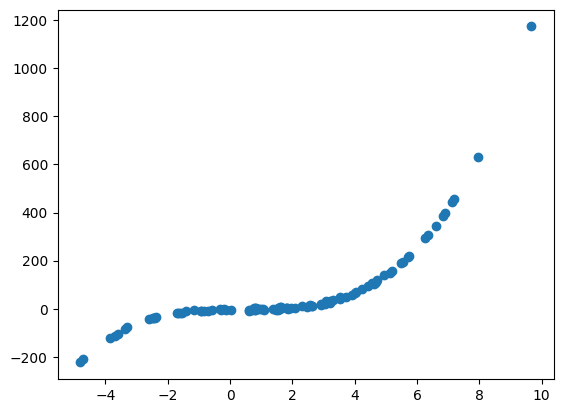

In [2]:
plt.scatter(x, y)
plt.show()

In [4]:
polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(x)

In [5]:
#modelio kurimas

model= LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [6]:
y_poly_pred = model.predict(x_poly)

In [7]:
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r = model.score(x_poly, y)
print('rmse', rmse, 'r2', r, sep ='\t')

rmse	3.072743608208423	r2	0.9996788340617946


In [11]:
len(y_poly_pred)

100

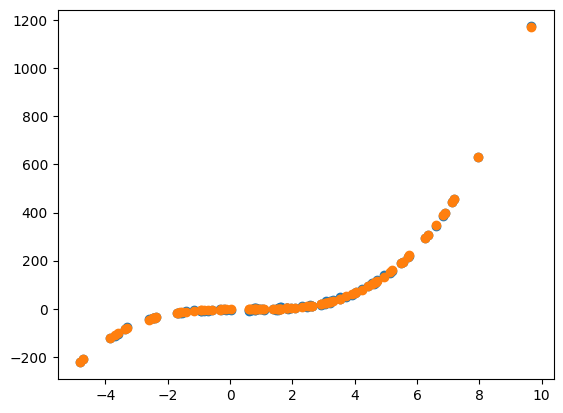

In [13]:
plt.scatter(x,y)
plt.scatter(x, y_poly_pred)
plt.show()

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)
# split the train and test dataset
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 96.49122807017544


C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0])

<Axes: >

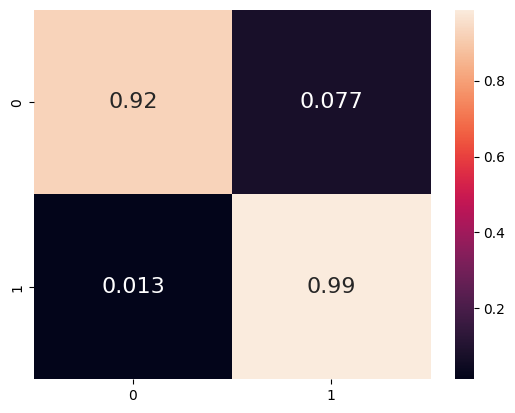

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})
#ax.collections[0].colorbar.ax.tick_params(labelsize=fontsize) #uncomment to change colorbar labelsize

In [21]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")
print("Path to dataset files:", path)
df = pd.read_csv(path+"/loan_data.csv"); df.head()

C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 751k/751k [00:01<00:00, 728kB/s]

Extracting files...
Path to dataset files: C:\Users\pauli\.cache\kagglehub\datasets\taweilo\loan-approval-classification-data\versions\1


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [30]:
X= df.drop(columns=['person_gender', 'person_education','person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_status' ])
y=df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 81.72222222222221


C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
X= df.drop(columns=['loan_status' ])
y=df['loan_status']

In [43]:
l2 = LabelEncoder().fit_transform(df['person_gender'])
df['person_gender']=l2
df['person_gender']=df['person_gender'].astype(float)
l2 = LabelEncoder().fit_transform(df['person_education'])
df['person_education']=l2
df['person_education']=df['person_education'].astype(float)
l2 = LabelEncoder().fit_transform(df['person_home_ownership'])
df['person_home_ownership']=l2
df['person_home_ownership']=df['person_home_ownership'].astype(float)
l2 = LabelEncoder().fit_transform(df['loan_intent'])
df['loan_intent']=l2
df['loan_intent']=df['loan_intent'].astype(float)
l2 = LabelEncoder().fit_transform(df['previous_loan_defaults_on_file'])
df['previous_loan_defaults_on_file']=l2
df['previous_loan_defaults_on_file']=df['previous_loan_defaults_on_file'].astype(float)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 82.74444444444444


C:\Users\pauli\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  float64
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  